In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import pandas as pd

In [4]:
plotly.tools.set_credentials_file(username='temp2019', api_key='dOVAo2AwluLUBNtmj6lA')

In [5]:
train = pd.read_csv('data/train.csv')
train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
0,15000.0,36 months,11.99,498.15,B,B3,Quality Assurance Specialist,4 years,MORTGAGE,70000.0,...,32.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,295215.0,20500.0,453246940
1,3725.0,36 months,6.03,113.38,A,A1,NaN,NaN,MORTGAGE,52260.0,...,9.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,25130.0,14200.0,453313687
2,16000.0,36 months,11.14,524.89,B,B2,KIPP NYC,3 years,RENT,67500.0,...,22.0,f,0.0,1.0,INDIVIDUAL,0.0,193.0,41737.0,19448.0,453283543
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
4,6500.0,36 months,12.69,218.05,B,B5,Medtox Laboratories,10+ years,RENT,41000.0,...,12.0,f,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,453350283


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 36 columns):
loan_amnt                     200189 non-null float64
term                          200189 non-null object
int_rate                      200189 non-null float64
installment                   200189 non-null float64
grade                         200189 non-null object
sub_grade                     200189 non-null object
emp_title                     189062 non-null object
emp_length                    192135 non-null object
home_ownership                200189 non-null object
annual_inc                    200189 non-null float64
verification_status           200189 non-null object
issue_d                       200189 non-null object
loan_status                   200189 non-null int64
pymnt_plan                    200189 non-null object
purpose                       200189 non-null object
zip_code                      200189 non-null object
addr_state                    200189 n

In [103]:
def Nan_killer(x, num = -999):
    x['revol_util'] = x['revol_util'].fillna(num)
  #  x['tot_coll_amt'] = x['tot_coll_amt'].fillna(num)
    x['tot_cur_bal'] =  x['tot_cur_bal'].fillna(num)
    x['total_rev_hi_lim'] =  x['total_rev_hi_lim'].fillna(num)
    

In [104]:
def proc(x,y):
  #  x['home_ownership'] = x['home_ownership'].astype(str).map(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)
  #  x['purpose'] = x['purpose'].astype(str).map(lambda x: 'other' if x in ['educational', 'renewable_energy','vacation','house','wedding','moving','medical','car','small_business','major_purchase'] else x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
    x_test['sub_grade'] = x_test['sub_grade'].astype('str').map(lambda x: ord(x[0])*10 + int(x[1]))
    x_train['sub_grade'] = x_train['sub_grade'].astype('str').map(lambda x: ord(x[0])*10 + int(x[1]))
    x_train = pd.get_dummies(x_train, columns = ['purpose','home_ownership','term','verification_status'])   # OHE (?????)
    x_test = pd.get_dummies(x_test, columns = ['purpose','home_ownership','term','verification_status'])
    for i in list(x_test): # удаление из тестовых данных столбцов, если их не было в тренировочных
        if i not in list(x_train):
            list(my_dataframe)
            x_test.drop(i, axis=1, inplace=True)
    for i in list(x_train): # добавление колонки с нулями, если такой нет в тестовой
        if i not in list(x_test):
            x_test[i] = 0
    

    x_test = x_test.reindex(sorted(x_test.columns), axis=1)
    x_train = x_train.reindex(sorted(x_test.columns), axis=1)
    return x_train, x_test, y_train, y_test

In [ ]:
int_rate: 25.972716175084315
dti: 11.031957842542475
annual_inc: 8.472242449932239
sub_grade: 6.462579401078634
total_acc: 6.1212014051391215
installment: 6.034723638012342
revol_util: 6.0337568882955335
tot_cur_bal: 5.1400669982907035
term: 4.536905142706872
revol_bal: 3.4909984431866565
loan_amnt: 2.8725740327126212
-open_acc: 2.726149596281768
-total_rev_hi_lim: 2.702060545235106
-initial_list_status: 2.304980919731754
-tot_coll_amt: 1.9502617844433556
purpose: 1.8085408452516178
-inq_last_6mths: 1.58969784576102
home_ownership: 0.7485860463138752
verification_status: 0.0

## K-means

In [60]:
from sklearn.cluster import KMeans

In [61]:
x =  train.loc[:,['total_rev_hi_lim','inq_last_6mths','dti']]
x['total_rev_hi_lim'] = x['total_rev_hi_lim'].fillna(0)
x['total_rev_hi_lim'] = x['total_rev_hi_lim']/10000
x.head()

,total_rev_hi_lim,inq_last_6mths,dti
0,2.0500,1.0,13.85
1,1.4200,0.0,19.43
2,1.9448,0.0,14.77
3,1.4500,0.0,39.00
4,0.0000,0.0,18.35


In [72]:
kmeans = KMeans(n_clusters=4, random_state=42, n_jobs = -1, init = 'random').fit(x)

In [73]:
kmeans.labels_

array([3, 1, 3, ..., 1, 1, 3])

In [74]:
y_kmeans = kmeans.fit_predict(x)

In [75]:
kmeans.cluster_centers_

array([[ 1.66656955,  0.84075552,  6.42881139],
       [ 2.25673453,  0.8673769 , 20.9895445 ],
       [ 3.03327762,  0.83898693, 29.32309902],
       [ 2.23819713,  0.84871437, 13.85539039]])

In [76]:
col = list(x.columns)

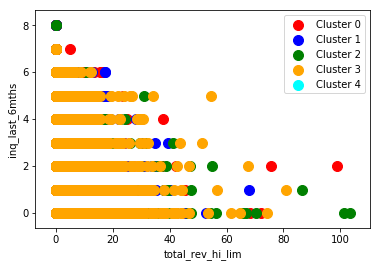

In [77]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[0]], x[y_kmeans == 0][col[1]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[1]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[1]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[1]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[1]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.legend()

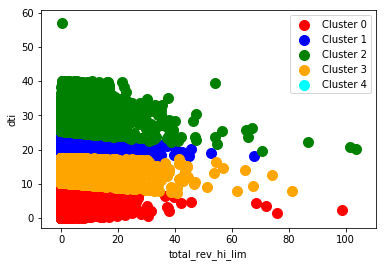

In [78]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[0]], x[y_kmeans == 0][col[2]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[2])
plt.legend()

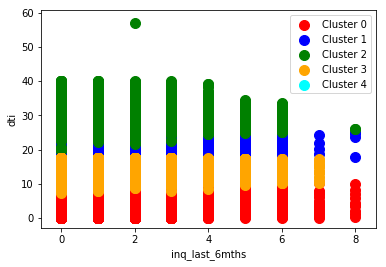

In [79]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[1]], x[y_kmeans == 0][col[2]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[1]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[1]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[1]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[1]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[1])
plt.ylabel(col[2])
plt.legend()

In [80]:
from mpl_toolkits.mplot3d import Axes3D

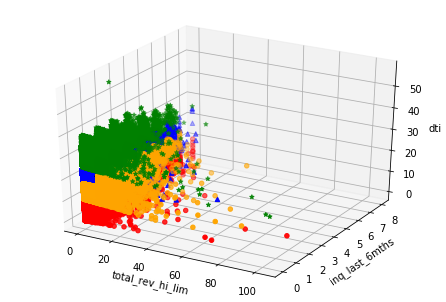

In [81]:
fig = plt.figure()
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i,c, m  in [(0,'red', 'o'), (1,'blue', '^'),(2,'green', '*'),(3,'orange', 'o'),(4,'cyan', 'o')]:
    xs = x[y_kmeans == i][col[0]]
    ys = x[y_kmeans == i][col[1]]
    zs = x[y_kmeans == i][col[2]]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.set_zlabel(col[2])

plt.show()

## EM

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [17]:
x =  train.loc[:,['total_rev_hi_lim','inq_last_6mths','loan_amnt']]
x['total_rev_hi_lim'] = x['total_rev_hi_lim'].fillna(0)
x['total_rev_hi_lim'] = x['total_rev_hi_lim']
x['loan_amnt'] = x['loan_amnt']
x.head()

,total_rev_hi_lim,inq_last_6mths,loan_amnt
0,20500.0,1.0,15000.0
1,14200.0,0.0,3725.0
2,19448.0,0.0,16000.0
3,14500.0,0.0,4200.0
4,0.0,0.0,6500.0


In [48]:
db = GaussianMixture(n_components = 2, random_state = 42`).fit(x)

In [49]:
y_kmeans = db.fit_predict(x)

In [50]:
col = list(x.columns)

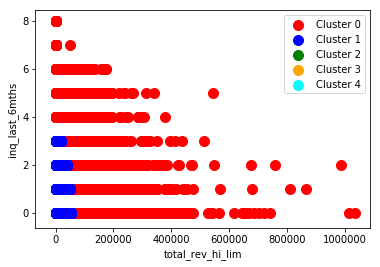

In [51]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[0]], x[y_kmeans == 0][col[1]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[1]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[1]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[1]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[1]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[1])
plt.legend()

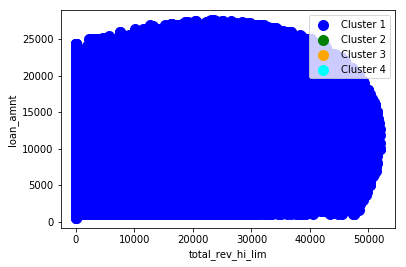

In [52]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 1][col[0]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[0]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[0]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[0]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[0])
plt.ylabel(col[2])
plt.legend()

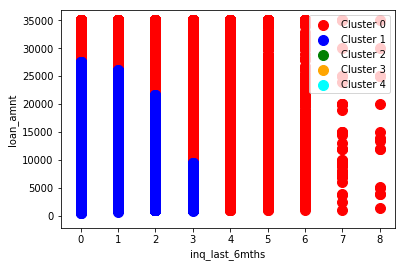

In [53]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0][col[1]], x[y_kmeans == 0][col[2]], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1][col[1]], x[y_kmeans == 1][col[2]], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2][col[1]], x[y_kmeans == 2][col[2]], s = 100, c = 'green',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3][col[1]], x[y_kmeans == 3][col[2]], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4][col[1]], x[y_kmeans == 4][col[2]], s = 100, c = 'cyan',label = 'Cluster 4')
plt.xlabel(col[1])
plt.ylabel(col[2])
plt.legend()

In [54]:
from mpl_toolkits.mplot3d import Axes3D

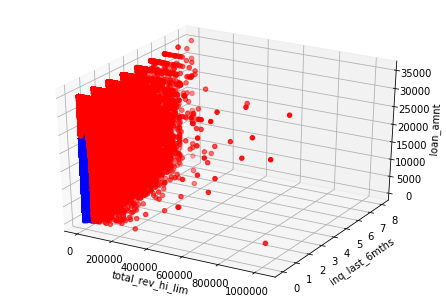

In [55]:
fig = plt.figure()
ax = Axes3D(fig)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i,c, m  in [(0,'red', 'o'), (1,'blue', '^'),(2,'green', '*'),(3,'orange', 'o'),(4,'cyan', 'o')]:
    xs = x[y_kmeans == i][col[0]]
    ys = x[y_kmeans == i][col[1]]
    zs = x[y_kmeans == i][col[2]]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(col[0])
ax.set_ylabel(col[1])
ax.set_zlabel(col[2])

plt.show()